# Data Wrangling

In [2]:
# Import libraries
import seaborn as sns
import pandas as pd 
import numpy as np

In [3]:
kashti = sns.load_dataset('titanic')

In [4]:
ks1 = sns.load_dataset('titanic')
ks2 = sns.load_dataset('titanic')

In [5]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# simple operations along series(column) using math (operators
(kashti['age'] +10).head(10)

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
5     NaN
6    64.0
7    12.0
8    37.0
9    24.0
Name: age, dtype: float64

# Steps of Data Wrangling

## Dealing with missing values
- In a data set missing values are either ? or N/A or NaN, or 0 or a blank cell.
- Jab kabhi data na ho kisi aik row me kis b aik parameter ka
  
> Steps:

1. Koshish karen dubara data collect kar len ya dekh le agar kahi galti hy
2. Missing values wala variable(column) hi nakal den agar data per effect nahi hota ya simple row
   or entry data entry remove kar den
3. Replace the missing value:
    1. How?
       1. Average value of entire variable or simple data point
       2. Frequency or MODE replacement
       3. Replace based on other functions(Data sampler knows that)
       4. ML algorthims can also be used
       5. Leave it like that
    2. Why leave it?
       1. Its better because no data is lost
       2. Less accurate

In [7]:
# Where exactly missing values are?
kashti.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
print(kashti.shape)

(891, 15)


In [9]:
kashti.dropna(subset=['deck'], axis=0, inplace=True)

In [10]:
kashti.isnull().sum()

survived        0
pclass          0
sex             0
age            19
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
deck            0
embark_town     2
alive           0
alone           0
dtype: int64

In [11]:
# To remove and update new dataframe
kashti = kashti.dropna()
kashti.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [12]:
kashti.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [13]:
kashti.shape

(182, 15)

In [14]:
ks1.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Replacing missing values with the average of that column

In [15]:
ks1.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
# finding the average (mean)
age_mean = ks1['age'].mean()
age_mean

29.69911764705882

In [17]:
ks1['age'] = ks1['age'].replace(np.nan, age_mean)

In [18]:
ks1.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [19]:
embark_town_mean = ks1['embark_town'].isnull().mean()
embark_town_mean

0.002244668911335578

In [20]:
ks1['embark_town'] = ks1['embark_town'].replace(np.nan, embark_town_mean, )

In [21]:
ks1.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [22]:
embark_mean = ks1['embarked'].isnull().mean()
embark_mean

0.002244668911335578

In [23]:
ks1['embarked'] = ks1['embarked'].replace(np.nan, embark_mean, )
ks1.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

<AxesSubplot:>

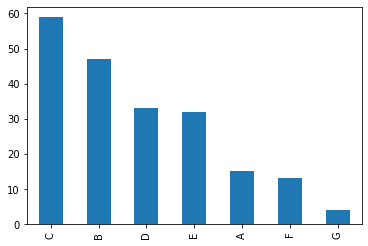

In [24]:

ks1['deck'].value_counts().plot.bar()

In [25]:
ks1['deck'].mode()

0    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [26]:
ks1['deck'].fillna("G", inplace = True)
ks1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

<AxesSubplot:>

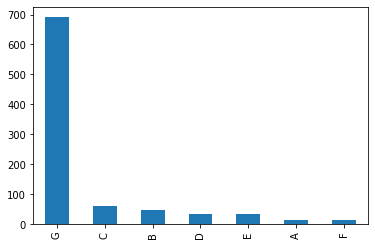

In [27]:
ks1['deck'].value_counts().plot.bar()

# Data Formating

  - Data ko aik common standard per lana
  - Ensures data is consitent and understandable
      - Easy to gather
      - Easy to work
      - Data must be in the same format. 
        - if data is in small like as <span style='color:red'>(KWL)</span> then all must be small, and if large like <span style='color:red'>(Khanewal)</span> then all must be in large
        - Khanewal(KWL)
        - Faisalabad(FSD)
        - Lahore(LHR)
        - Islamabad(ISL)
        - Karachi(KCH)
        - Peshawar(PEW)
        - jaisay chillay me log apni marzi karty hamesha
        - convert g to kg or similar uni for all <span style='color:red'>(numerical data must be in one unit)</span>
        - one standard unit in each column 
        - ft != cm

In [28]:
# Know the data type and convert it into the known
kashti.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [29]:
# to convert the datatype into anothor format
kashti['survived'] = kashti["survived"].astype('float64')
kashti.dtypes

survived        float64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [30]:
# to convert datatype into its oringnal format
kashti['survived'] = kashti["survived"].astype('int64')
kashti.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [31]:
#convert age in days 
ks1['age'] = ks1['age']*365
ks1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,8030.0,1,0,7.2500,S,Third,man,True,G,Southampton,no,False
1,1,1,female,13870.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,9490.0,0,0,7.9250,S,Third,woman,False,G,Southampton,yes,True
3,1,1,female,12775.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,12775.0,0,0,8.0500,S,Third,man,True,G,Southampton,no,True


In [32]:
ks1.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [33]:
ks1["age"] = ks1["age"].astype('int64')
ks1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,8030,1,0,7.2500,S,Third,man,True,G,Southampton,no,False
1,1,1,female,13870,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,9490,0,0,7.9250,S,Third,woman,False,G,Southampton,yes,True
3,1,1,female,12775,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,12775,0,0,8.0500,S,Third,man,True,G,Southampton,no,True


In [34]:
# rename column name 
ks1.rename (columns={'age': 'age_in_days'}, inplace=True)
ks1.head()

,survived,pclass,sex,age_in_days,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,8030,1,0,7.2500,S,Third,man,True,G,Southampton,no,False
1,1,1,female,13870,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,9490,0,0,7.9250,S,Third,woman,False,G,Southampton,yes,True
3,1,1,female,12775,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,12775,0,0,8.0500,S,Third,man,True,G,Southampton,no,True


# Data Normalization
- Uniform the data
- They have same impact
- Aik machli sumandar main or aik jar main
- Also for computational reasons

In [35]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [37]:
ks4 =ks1 [['age_in_days', 'fare']]
ks4.head()

,age_in_days,fare
0,8030,7.2500
1,13870,71.2833
2,9490,7.9250
3,12775,53.1000
4,12775,8.0500


# Method of Normalization
1. Simple feature scaling
   - x(new)=x(old) / x(max)
2. Min/Max method
3. Z-score(standard score) -3 to +3
4. Log Transformation

In [47]:
# simple feature scaling
ks4['fare'] = ks4['fare']/ks4['fare'].max()
ks4.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8104\3367549808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks4['fare'] = ks4['fare']/ks4['fare'].max()


,age_in_days,fare
0,0.2750,0.014151
1,0.4750,0.139136
2,0.3250,0.015469
3,0.4375,0.103644
4,0.4375,0.015713


In [48]:
ks4['age_in_days'] = ks4['age_in_days']/ks4['age_in_days'].max()
ks4.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8104\1690623833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks4['age_in_days'] = ks4['age_in_days']/ks4['age_in_days'].max()


,age_in_days,fare
0,0.2750,0.014151
1,0.4750,0.139136
2,0.3250,0.015469
3,0.4375,0.103644
4,0.4375,0.015713


C:\Users\DELL\AppData\Local\Temp\ipykernel_8104\989904024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks4['fare'] = ks4['fare']/ks4['fare'].max()


<AxesSubplot:>

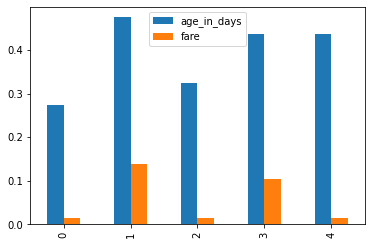

In [49]:
ks4['fare'] = ks4['fare']/ks4['fare'].max()
ks4.head().plot.bar()

<AxesSubplot:>

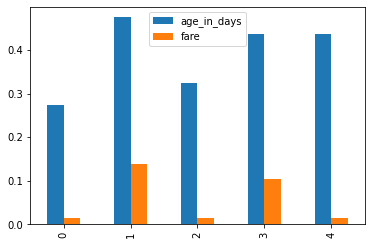

In [50]:
ks4.head().plot.bar()

In [51]:
# Min/Max method
ks4['fare'] = (ks4['fare']-ks4['fare'].min()) / (ks4['fare'].max() - ks4['fare'].min())
ks4.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8104\160855112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks4['fare'] = (ks4['fare']-ks4['fare'].min()) / (ks4['fare'].max() - ks4['fare'].min())


,age_in_days,fare
0,0.2750,0.014151
1,0.4750,0.139136
2,0.3250,0.015469
3,0.4375,0.103644
4,0.4375,0.015713


In [53]:
ks5 = ks1
ks5.head()

,survived,pclass,sex,age_in_days,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,8030,1,0,7.2500,S,Third,man,True,G,Southampton,no,False
1,1,1,female,13870,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,9490,0,0,7.9250,S,Third,woman,False,G,Southampton,yes,True
3,1,1,female,12775,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,12775,0,0,8.0500,S,Third,man,True,G,Southampton,no,True


In [54]:
# Z- score (standard score)
ks5['fare'] = (ks4['fare']-ks4['fare'].mean()) / ks4['fare'].std()
ks5.head()

,survived,pclass,sex,age_in_days,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,8030,1,0,-0.502163,S,Third,man,True,G,Southampton,no,False
1,1,1,female,13870,1,0,0.786404,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,9490,0,0,-0.488580,S,Third,woman,False,G,Southampton,yes,True
3,1,1,female,12775,1,0,0.420494,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,12775,0,0,-0.486064,S,Third,man,True,G,Southampton,no,True


In [55]:
# log transformation
ks5['age_in_days'] = np.log(ks5['age_in_days']) 
ks5.head()

,survived,pclass,sex,age_in_days,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,8.990940,1,0,-0.502163,S,Third,man,True,G,Southampton,no,False
1,1,1,female,9.537484,1,0,0.786404,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,9.157994,0,0,-0.488580,S,Third,woman,False,G,Southampton,yes,True
3,1,1,female,9.455245,1,0,0.420494,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,9.455245,0,0,-0.486064,S,Third,man,True,G,Southampton,no,True


# Binning
- Grouping of values into smaller number of values(bins)
- Convert numeric into categories __(Jawn, Bachy, Budhy)__ or 1-16, 17-30 etc
- To have better understandig of groups
  - Low vs High price

In [56]:
kashti.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

# Converting categories into dummies
- easy use for computation
- Male Female (0, 1)

In [70]:
pd.get_dummies(ks5['sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [75]:
ks5 = sns.load_dataset('titanic')

In [79]:
ks5.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [84]:
pd.get_dummies(ks5['sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


<AxesSubplot:xlabel='age', ylabel='fare'>

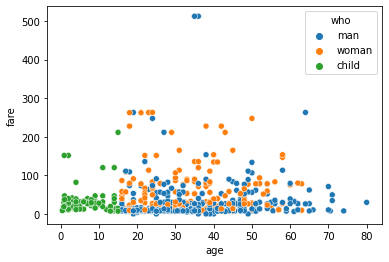

In [95]:
sns.scatterplot(x='age', y='fare', data= ks5, hue= 'who')

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

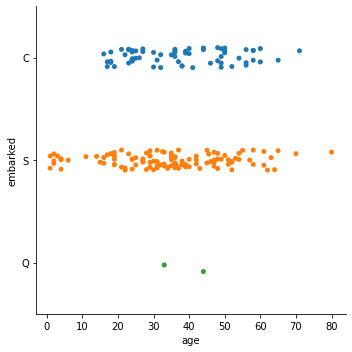

In [102]:
sns.catplot(x = 'age', y = 'embarked', data = kashti)

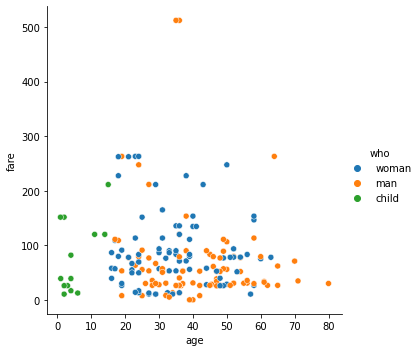

In [98]:
sns.relplot(x = 'age', y= 'fare', data = kashti, hue = 'who')

<AxesSubplot:xlabel='fare', ylabel='sex'>

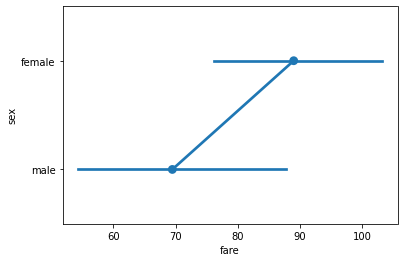

In [105]:
sns.pointplot(x = 'fare', y = 'sex', data=kashti)

In [101]:
kashti.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<AxesSubplot:xlabel='age', ylabel='parch'>

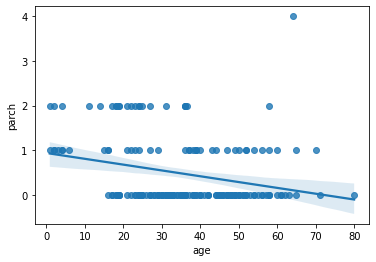

In [126]:
sns.regplot(x = 'age', y = 'parch' ,data = kashti)

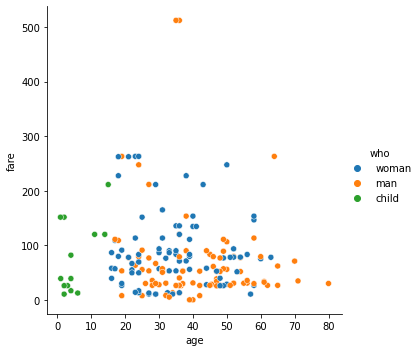

In [135]:
sns.relplot(x = 'age', y = 'fare', data = kashti, hue = "who")

<AxesSubplot:xlabel='age', ylabel='fare'>

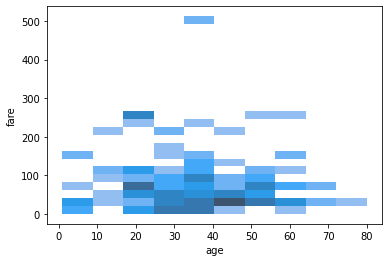

In [137]:
sns.histplot(x = 'age', y = 'fare', data = kashti)

{'whiskers': [<matplotlib.lines.Line2D at 0x25e2e6af9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x25e2e6aff70>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e2e6af700>],
 'medians': [<matplotlib.lines.Line2D at 0x25e3525c550>],
 'fliers': [<matplotlib.lines.Line2D at 0x25e3525c820>],
 'means': []}

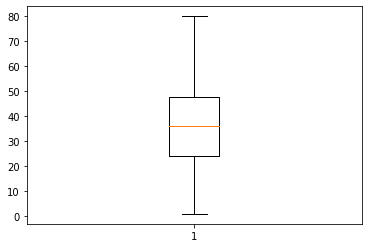

In [139]:
plt.boxplot(x = 'age', data  = kashti)

<AxesSubplot:xlabel='parch', ylabel='count'>

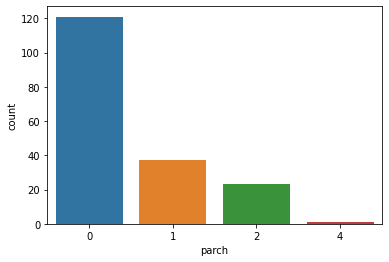

In [152]:
sns.countplot( data = kashti, x = 'parch')

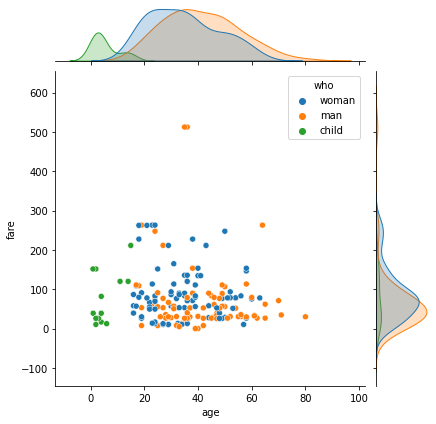

In [157]:
sns.jointplot(x = 'age', y = 'fare', data = kashti, hue = 'who')

In [161]:
sns.FacetGrid(kashti, x = 'age', hue = "who")

TypeError: FacetGrid.__init__() got an unexpected keyword argument 'x'

<AxesSubplot:xlabel='age', ylabel='fare'>

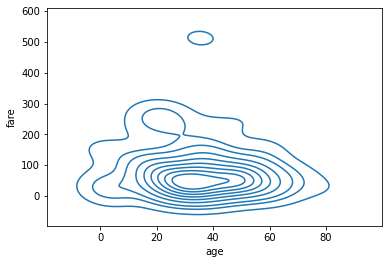

In [162]:
sns.kdeplot(x='age', y= 'fare', data = kashti)